# Анализ результатов А/Б  теста

У нас есть данные по проведённому А/Б тесту. И список гипотез, которые нужно приоритезировать. 
В этом проекте будет 2 части, сначала разберёмся с гипотезами, приоритезируем и дадим рекомендации воображаемым колегам о очерёдности тестирования.

Во 2 части, будем анализировать результаты А/В теста, выясним есть ли значимые различия между 2 исследуемыми группами.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

import warnings
warnings.simplefilter('ignore')

from scipy import stats as st
import numpy as np
import math as mth

In [5]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders =  pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [7]:
print(orders.head(5))
orders.info()

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
print(visitors.head(5))
orders.info()

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.pivot_table(index = 'date', columns='group', values='visitors')

group,A,B
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707
2019-08-06,667,655
2019-08-07,644,709
2019-08-08,610,654
2019-08-09,617,610


### Вывод

Пропусков нет. Нужно подправить заголовки столбцов в таблицах visitors и orders. В группах А и Б посещений сайта во все дни эксперимента примерно поровну, значит всё честно.

## Предобработка данных

In [10]:
#Поменяю названия столбцов, как учили на курсе "Предобработка данных"
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [11]:
#Приводим даты и время в правильный формат
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
print('Количество дубликатов в таблице orders', orders.duplicated().sum())
print('Количество дубликатов в таблице visitors', visitors.duplicated().sum())

Количество дубликатов в таблице orders 0
Количество дубликатов в таблице visitors 0


# Часть 1 – Приоритизация гипотез

**Задача**

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [13]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [14]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])
hypothesis['RICE'] = round((hypothesis['reach'] * 
                      hypothesis['impact'] * 
                      hypothesis['confidence']) / hypothesis['efforts'])
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.0,16.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.0,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.0,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.0,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.0,4.0


In [15]:
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.0,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.0,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.0,16.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


### Вывод

Разница в сортировке гипотез получилось из-за того что фреймворк ICE учитывает только силу гипотез, но не учитывает охват.

Фреймворк RICE, учитывает скольких пользователей затронут изменения (Reach – Охват). Так, например, гипотеза №8 обладает большой силой и во фреймворке ICE  занимает первую позицию, но низких охват всего в один балл перемещает её во фреймворке RICE на 5 строчку.

Честно говоря я вообще не понимаю зачем нуже фреймворк ICE )))



# Часть 2 – Обработка результатов A/B-теста


## График кумулятивной выручки по группам

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                            .agg({'date' : 'max', 
                                  'group' : 'max', 
                                  'transaction_id' : 'nunique', 
                                  'visitor_id' : 'nunique', 
                                  'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])] \
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

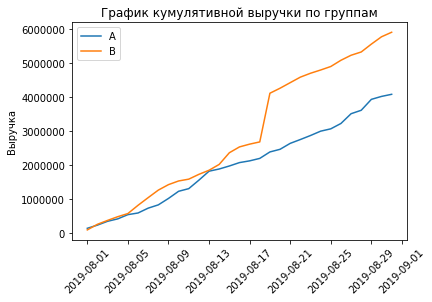

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.show()

Судя по графику 17 августа 2019г. была совершена крупная покупка которая сильно повлияла на куммулятивную выручку в группе Б. Нужно либо удалять крупный заказ либо собирать больше данных.

## График кумулятивного среднего чека по группам

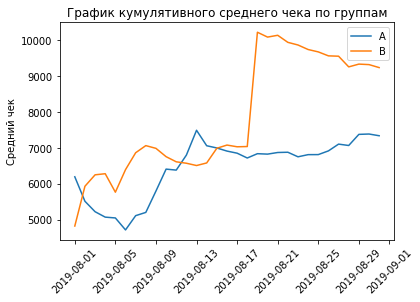

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.show()

Таже самая покупка 17 августа 2019г. сильно отклонила средний чек в группе Б. Нам нужно либо удалить большие заказы либо собрать больше данных чтобы средний чек стабилизировался.

## График относительного изменения кумулятивного среднего чека группы B к A

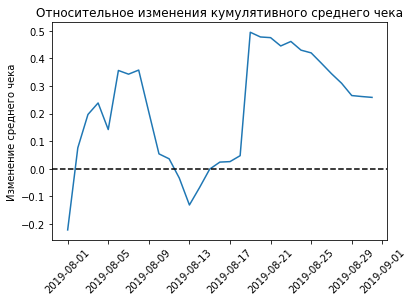

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменения кумулятивного среднего чека')
plt.ylabel('Изменение среднего чека')
plt.show()

График очень сильно скачет, еще одно подтверждение, что в наших данных много крупных заказов.

## График кумулятивной конверсии по группам

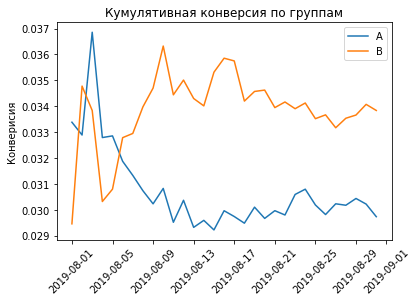

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Конверисия')
plt.show()


На графике конверсии тоже видим очень сильные колебания, в целом конверсия в группе Б выше чем в группе А. 

## График относительного изменения кумулятивной конверсии группы B к группе A

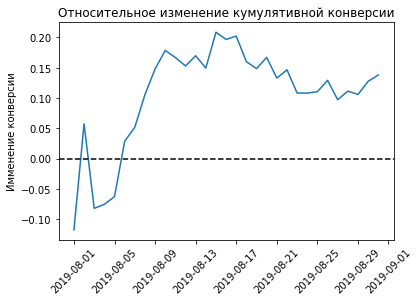

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left',
                                                                           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии')
plt.ylabel('Имменение конверсии')
plt.show()


В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. 
В целом конверсия в группе B получается выше. Но стоит проанализировать выбросы, возможно, они изменят картину. 

## Точечный график количества заказов по пользователям

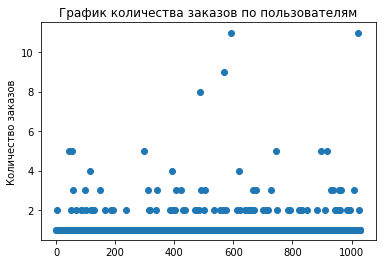

In [22]:
# Сгруппируем таблицу с количеством заказов на одного пользователя
ordersByUsers = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()
ordersByUsers.columns = ['visitor_id','orders']

#Постороим диагрумму рассеивания
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

In [23]:
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [24]:
## Расчёт 95-ого и 99-ого перцентилей количества заказов на пользователя
print('Не более 5% пользователей сделали больше чем', np.percentile(ordersByUsers['orders'], [95, 99])[0], 'заказа')
print('Не более 1% пользователей сделали больше чем', np.percentile(ordersByUsers['orders'], [95, 99])[1], 'заказа')

Не более 5% пользователей сделали больше чем 2.0 заказа
Не более 1% пользователей сделали больше чем 4.0 заказа


Принимаем за верхнюю границу 2 заказа. Если пользователь сделал более 2-х заказов, считаем это анамалией.

## Точечный график стоимостей заказов

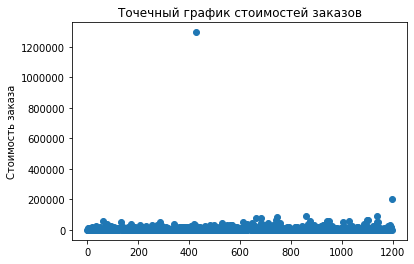

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show()

Вот и обнаружились богатеи. Навальный, наверное, как-то так ищет жертв для своих обличительных видео))

In [27]:
#Создадим датафрейм без выбросов, обрежем заказы с аномальной стоимостью
orders_cut = orders.query('revenue < 28000')

#Найдём айдишники у которых не более 2-х заказов
ordersByUsers = ordersByUsers.query('orders <= 2')

#Обрежем датафрейм с заказами, оставим только тех пользователей которые сделали не более 2-х заказов
orders_cut = orders_cut.merge(ordersByUsers, on='visitor_id', how='inner')

#Разделим таблицу на группы
orders_cut_groupA = orders_cut.query('group == "A"')
orders_cut_groupB = orders_cut.query('group == "B"')

visitors_groupA = visitors.query('group == "A"')
visitors_groupB = visitors.query('group == "B"')

#Склеим визит с покупками
clean_cumulativeData_groupA = orders_cut_groupA.merge(visitors_groupA, on=['group', 'date']).groupby('date').agg({'visitor_id':'nunique', 
                                                             'orders':'sum', 
                                                             'visitors':'mean', 'revenue':'sum'}).reset_index()
clean_cumulativeData_groupB = orders_cut_groupB.merge(visitors_groupB, on=['group', 'date']).groupby('date').agg({'visitor_id':'nunique', 
                                                             'orders':'sum', 
                                                             'visitors':'mean', 'revenue':'sum'}).reset_index()

#Переименуем столбцы
clean_cumulativeData_groupA.columns = ['date', 'buyers', 'orders', 'visitors', 'revenue']
clean_cumulativeData_groupB.columns = ['date', 'buyers', 'orders', 'visitors', 'revenue']


#Найдём конверсию в очищенных данных
clean_cumulativeData_groupA['conversion'] = clean_cumulativeData_groupA['buyers'] \
                                        / clean_cumulativeData_groupA['visitors'] 
clean_cumulativeData_groupB['conversion'] = clean_cumulativeData_groupB['buyers'] \
                                        / clean_cumulativeData_groupB['visitors']

#Найдём средний чек в очищенных данных
clean_cumulativeData_groupA['average_check'] = round(clean_cumulativeData_groupA['revenue'] 
                                                     / clean_cumulativeData_groupA['buyers'])
clean_cumulativeData_groupB['average_check'] = round(clean_cumulativeData_groupB['revenue'] 
                                                     / clean_cumulativeData_groupB['buyers'])


## Статистическая значимость различий в конверсии между группами

### Определение нормальности распределения конверсий в группе А

In [28]:
#Проверим распределение конверсий на нормальность в группе А(сырые данные)
sample_A = cumulativeData.query('group == "A"')['conversion']

alpha = .05 # критический уровень статистической значимости

results = st.shapiro(sample_A)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value


print('Сырые данные')
print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

print()
print()

#Проверим распределение конверсий на нормальность в группе А(обработанные данные)
clean_sample_A = clean_cumulativeData_groupA['conversion']

alpha = .05 # критический уровень статистической значимости

results = st.shapiro(clean_sample_A)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value


print('Обработанные данные без выбросов')
print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

Сырые данные
p-значение:  6.356380254146643e-06
Отвергаем нулевую гипотезу: распределение не нормально


Обработанные данные без выбросов
p-значение:  0.0056268819607794285
Отвергаем нулевую гипотезу: распределение не нормально


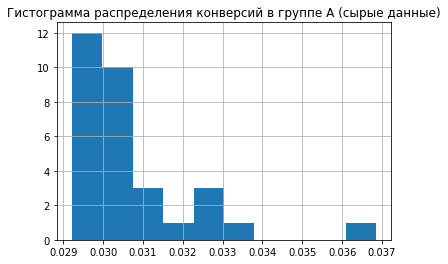

In [29]:
plt.title('Гистограмма распределения конверсий в группе А (сырые данные)')
cumulativeData.query('group == "A"')['conversion'].hist()

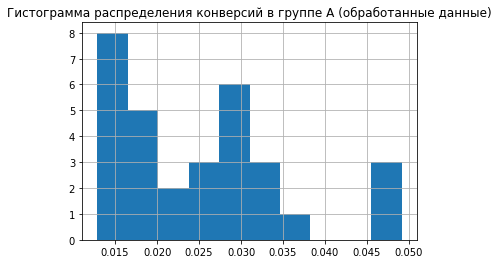

In [30]:
plt.title('Гистограмма распределения конверсий в группе А (обработанные данные)')
clean_cumulativeData_groupA['conversion'].hist()

### Определение нормальности распределения конверсий в группе B

In [31]:
#Проверим распределение конверсий на нормальность в группе B(сырые данные)
sample_B = cumulativeData.query('group == "B"')['conversion']

alpha = .05 # критический уровень статистической значимости

results = st.shapiro(sample_B)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value


print('Сырые данные')
print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

print()
print()

#Проверим распределение конверсий на нормальность в группе А(обработанные данные)
clean_sample_B = clean_cumulativeData_groupB['conversion']

alpha = .05 # критический уровень статистической значимости

results = st.shapiro(clean_sample_B)
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value


print('Обработанные данные без выбросов')
print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

Сырые данные
p-значение:  0.0009982470655813813
Отвергаем нулевую гипотезу: распределение не нормально


Обработанные данные без выбросов
p-значение:  0.43534383177757263
Не получилось отвергнуть нулевую гипотезу, распределение нормально


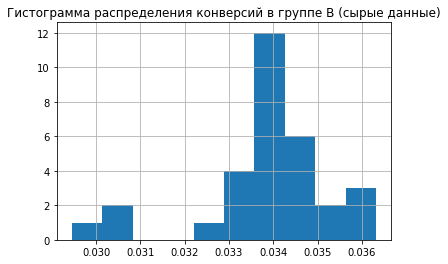

In [32]:
plt.title('Гистограмма распределения конверсий в группе B (сырые данные)')
cumulativeData.query('group == "B"')['conversion'].hist()

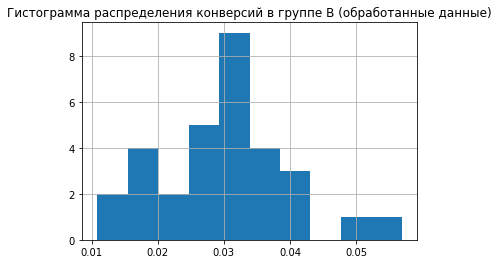

In [33]:
plt.title('Гистограмма распределения конверсий в группе B (обработанные данные)')
clean_cumulativeData_groupB['conversion'].hist()

Интересно, что распределение конверсий в группе B на обработанных данных по критерию Шапиро получается нормальным. Хотя по графику не скажешь.

## Вывод
У нас получились вообще какие-то старнные распределения в обоих группах. Они явно не похожи на нормальные. Значит т-тест не подойдёт. Для определения статистической значимости воспользуемся непараметрическим тестом Уилкоксона-Манна-Уитни.

### Непараметрический тест Уилкоксона-Манна-Уитни

Ниже будем проверять гипотезы, на проверку выдвигается:

     H0 =  Нет никакой разницы между группами А и Б в конверсии.
     H1 =  Между группами А и Б есть статистически значимая разница в конверсии.
 

In [34]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(sample_A , sample_B)
print('Сырые данные')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print()
print()
    
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(clean_sample_A , clean_sample_B)
print('Обработанные данные')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Сырые данные
p-значение:  1.2368310681408489e-08
Отвергаем нулевую гипотезу: разница статистически значима


Обработанные данные
p-значение:  0.014548165870626097
Отвергаем нулевую гипотезу: разница статистически значима


In [35]:
#Вычислим на сколько процентов в серднем конверсия в  группе Б выше чем в А
sample_AA = sample_A.reset_index().drop('index', axis=1 )
sample_BB = sample_B.reset_index().drop('index', axis=1 )
print('По сырым данным группа Б лучше группы А на', round((((sample_BB-sample_AA)/sample_AA)*100).median()[0]), 'процентов')


sample_AAA = clean_sample_A.reset_index().drop('index', axis=1 )
sample_BBB = clean_sample_B.reset_index().drop('index', axis=1 )
print('По очищенным данным группа Б лучше группы А на', round((((sample_BBB-sample_AAA)/sample_AAA)*100).median()[0]), 'процент')


По сырым данным группа Б лучше группы А на 13.0 процентов
По очищенным данным группа Б лучше группы А на 21.0 процент


 ### Вывод
 По "сырым" и обработанным данным получается , что конверсия в группах А и В различается статистически значимо.

#### Дополнительный вывод
По **сырым данным** конверсия в группе Б выше чем в группе А в среднем на 13%

По **очищенным данным** конверсия в группе Б выше чем в группе А в среднем на 21%

## Статистическая значимость различий в среднем чеке заказа между группами

In [36]:
cumulativeData['average_check'] = round(cumulativeData['revenue'] / cumulativeData['orders'])

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

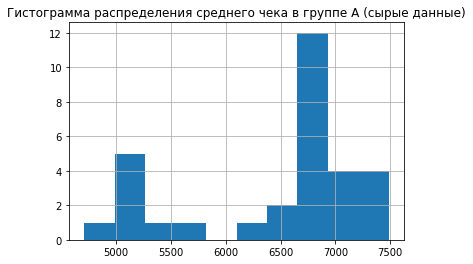

In [37]:
#Сначала постоим гистограммы распределения среднего чека
plt.title('Гистограмма распределения среднего чека в группе A (сырые данные)')
cumulativeDataA['average_check'].hist()

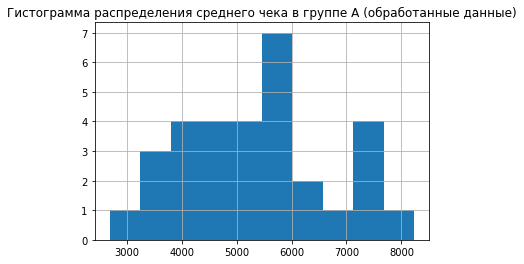

In [38]:
#Сначала постоим гистограммы распределения среднего чека
plt.title('Гистограмма распределения среднего чека в группе A (обработанные данные)')
clean_cumulativeData_groupA['average_check'].hist()

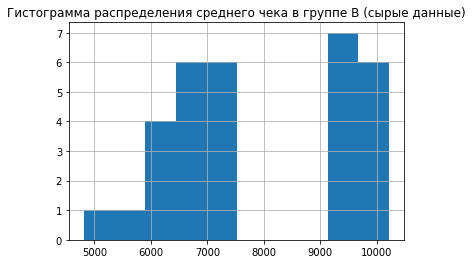

In [39]:
plt.title('Гистограмма распределения среднего чека в группе B (сырые данные)')
cumulativeDataB['average_check'].hist()

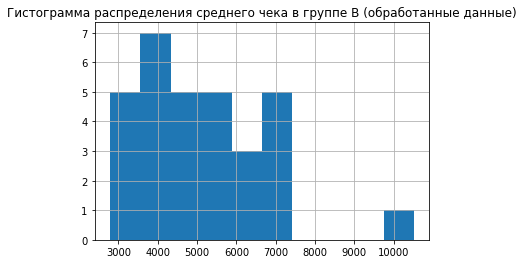

In [40]:
plt.title('Гистограмма распределения среднего чека в группе B (обработанные данные)')
clean_cumulativeData_groupB['average_check'].hist()

### Вывод
Ну явно не нормальные расперделения. Для определения статистической значимости воспользуемся непараметрическим тестом Уилкоксона-Манна-Уитни.

### Непараметрический тест Уилкоксона-Манна-Уитни

Ниже будем проверять гипотезы, на проверку выдвигается:

     H0 =  Нет никакой разницы между группами А и Б в среднем чеке.
     H1 =  Между группами А и Б есть статистически значимая разница в среднем чеке.
 


In [41]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(cumulativeDataA['average_check'] , cumulativeDataB['average_check'])
print('Сырые данные')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")
    
print()
print()
    
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(clean_cumulativeData_groupA['average_check'] , clean_cumulativeData_groupB['average_check'])

print('p-значение: ', results.pvalue)
print('Обработанные данные')
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Сырые данные
p-значение:  0.004235540740704507
Отвергаем нулевую гипотезу: разница статистически значима


p-значение:  0.2111380543234191
Обработанные данные
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [42]:
#Вычислим на сколько процентов в серднем конверсия в  группе Б выше чем в А
sample_AA = cumulativeDataA['average_check'].reset_index().drop('index', axis=1 )
sample_BB = cumulativeDataB['average_check'].reset_index().drop('index', axis=1 )
print('По сырым данным средний чек в группе Б лучше, чем в группе А на', 
      round((((sample_BB-sample_AA)/sample_AA)*100).median()[0]), 
      'процентов')


sample_AAA = clean_cumulativeData_groupA['average_check'].reset_index().drop('index', axis=1 )
sample_BBB = clean_cumulativeData_groupB['average_check'].reset_index().drop('index', axis=1 )
print('По очищенным данным средний чек в группе Б лучше, чем в группе А на', 
      round((((sample_BBB-sample_AAA)/sample_AAA)*100).median()[0]),
      'процент')


По сырым данным средний чек в группе Б лучше, чем в группе А на 26.0 процентов
По очищенным данным средний чек в группе Б лучше, чем в группе А на -1.0 процент


### Вывод

По сырым данным получается, что различия между средним чеком в группах А и Б есть, это из-за выбросов. Как только удаляем аномалии значимая разница пропадает.

#### Дополнительный вывод
Получается до того как мы почистили данные от выбросов средний чек в группе Б был выше чем средний чек в группе она 26 %. Очень много. На очищенных данных статистический тест показал отсутствие различий. После того как я посчитал разницу в процентах между группами Б и А, еще раз в этом убедился.

# Мой вердикт

**По части тестирования гипотез** предлагаю протестировать 4 гипотезы в таком порядке, для приоритезации использовал фреймворк RICE.

            7 	Добавить форму подписки на все основные страни... RICE = 112
            2 	Добавить блоки рекомендаций товаров на сайт ин... RICE = 56
            0 	Добавить два новых канала привлечения трафика,... RICE = 40.0
            6 	Показать на главной странице баннеры с актуаль... RICE = 40.0
      
      
      
**По части обработки результатов A/B теста**

А/Б тест удачный, удалось обнаружить значимое различие в конверсии между группами А и Б. Причем конверсия в группе Б выше чем в А на 21% и это уже на очищенных от выбросов данных. 
По среднему чеку различий в группах А и Б обнаружить не получилось. 

Если тест обходится не дорого, то можно его продлить еще на 1 месяц, чтобы накопить немного больше данных, на текущий момент метрики еще не достаточно стабилизировались.

Ну, а если тест затратный, то я бы отстановил тест и зафиксировал, что в группе Б конверсия лучше. И начал бы тестировать другие гипотезы.